This notebook compares all models and graphs them to see which has the lowest RSME

# Import Packages and Data

In [61]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
simple_mean = pd.read_csv('model_one.csv')
simple_mean = simple_mean.dropna()

In [63]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean = pd.read_csv('model_two.csv')
weighted_mean = weighted_mean.dropna()

In [64]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa = pd.read_csv('model_three.csv')
weighted_mean_with_pa = weighted_mean_with_pa.dropna()

In [65]:
# Import model1 projections drop rows with empty data (rookies and 2025 seasons)
weighted_mean_with_pa_regress_to_mean = pd.read_csv('model_four.csv')
weighted_mean_with_pa_regress_to_mean = weighted_mean_with_pa_regress_to_mean.dropna()

In [66]:
# Import model1 projections drop rows with empty data (rookies, second, third, and 2025 seasons)
lasso = pd.read_csv('model_five.csv')
lasso = lasso.dropna()

In [67]:
steamer = pd.read_csv('steamer.csv')
steamer = steamer.dropna()

In [68]:
zips = pd.read_csv('zips.csv')
zips = zips.dropna()

In [69]:
#Formula to caluculate RSME
def calculate_rsme(dataframe, value):
    dataframe['Error'] = dataframe[value] - dataframe[f"Projected_{value}"]
    dataframe['Squared_Error'] = dataframe['Error'] ** 2
    overall_rsme = np.sqrt(dataframe['Squared_Error'].mean())
    return overall_rsme

In [70]:
non_pa_list = ['G', 'AB', 'PA', 'AVG', 'BB%', 'OPS', 'ISO', 'wRAA', 'wRC+']
pa_list = ['H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SH', 'SB', 'wRC', 'WAR']
filtered_list = pa_list + non_pa_list

In [71]:
simple_mean1 = {}
for col in filtered_list:
    simple_mean1[col] = calculate_rsme(simple_mean, col)

In [72]:
weighted_mean2 = {}
for col in filtered_list:
    weighted_mean2[col] = calculate_rsme(weighted_mean, col)

In [73]:
weighted_mean_with_pa3 = {}
for col in filtered_list:
    weighted_mean_with_pa3[col] = calculate_rsme(weighted_mean_with_pa, col)

In [74]:
weighted_mean_with_pa_regress_to_mean4 = {}
for col in filtered_list:
    weighted_mean_with_pa_regress_to_mean4[col] = calculate_rsme(weighted_mean_with_pa_regress_to_mean, col)

In [75]:
lasso5 = {}
for col in filtered_list:
    lasso5[col] = calculate_rsme(lasso, col)

In [76]:
steamer6 = {}
for col in filtered_list:
    steamer6[col] = calculate_rsme(steamer, col)

In [77]:
zips7 = {}
for col in filtered_list:
    zips7[col] = calculate_rsme(zips, col)

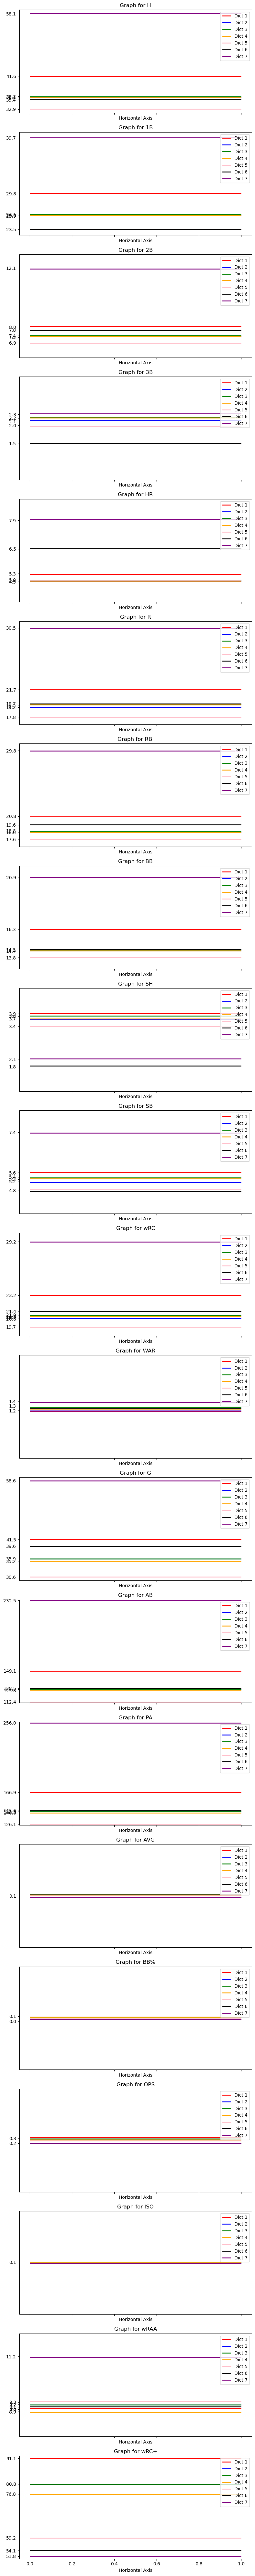

In [78]:
# Combine dictionaries into a list for easier handling
dicts = [simple_mean1, weighted_mean2, weighted_mean_with_pa3, weighted_mean_with_pa_regress_to_mean4, lasso5, steamer6, zips7]
keys = list(simple_mean1.keys())

# Set up subplots: one per key
fig, axes = plt.subplots(nrows=len(keys), ncols=1, figsize=(8, 80), sharex=True)

# Colors for the lines
colors = ['red', 'blue', 'green', 'orange', 'pink', 'black', 'purple']

# Plot data
for ax, key in zip(axes, keys):
    for i, d in enumerate(dicts):
        value = d[key]
        ax.hlines(y=value, xmin=0, xmax=1, colors=colors[i], linewidth=2, label=f'Dict {i+1}')
    ax.set_title(f"Graph for {key}")
    # Adjust y-axis ticks to fit float values
    y_min = min(d[key] for d in dicts) - 1  # Slight padding below the minimum
    y_max = max(d[key] for d in dicts) + 1  # Slight padding above the maximum
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(sorted(set([round(d[key], 1) for d in dicts])))  # Add rounded float ticks
    ax.set_xlabel("Horizontal Axis")
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


